In [1]:
import tensorflow as tf
import tensorflow.keras.initializers as initializers
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np

**Loading Data Set**



*   Loading mnist dataset
*   Seperate the dataset for training and testing
*   Normalise the dataset from 0-1 by dividing it by 255.0
*   Ploting and see the dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


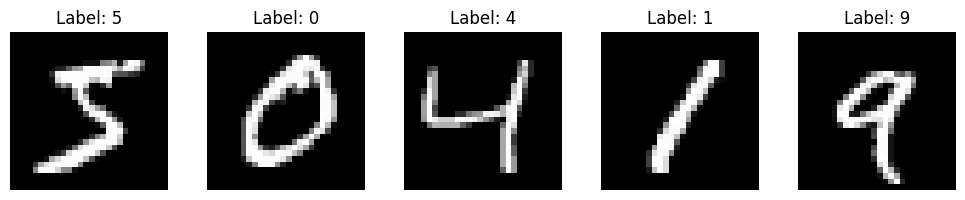

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
plt.figure(figsize=(10,2))
plot = plt.subplot(1,5,1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(x_train[i-1], cmap='gray')
    plt.title(f"Label: {y_train[i-1]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

**Prepare input**



*   Flatten the input 28 x 28 to 784
*   Change the output categories of training and testing set to one hot encoded values



In [3]:
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# **Fully convoluted Neural Network with No BatchNormalisation**



*   Input layer with shape 784
*   5 Hidden layers with 512 and with different activate function and initializer
*   Output layer of shape 10 with softmax classification




In [4]:
def Model_Fcnn_No_BN(activation_function, initializer_function, lr):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=(784,)))

  model.add(tf.keras.layers.Dense(512, activation = activation_function, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.Dense(512, activation = activation_function, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.Dense(512, activation = activation_function, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.Dense(512, activation = activation_function, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.Dense(512, activation = activation_function, kernel_initializer = initializer_function))

  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

# **Fully convoluted Neural Network with BatchNormalisation**



*   Input layer with shape 784
*   5 Hidden layers with 512, with different activate function, initializer
*   Batch Normalization

$\boldsymbol{\mu}_{i, b}^{(l)}=\frac{1}{N_b} \sum_{t=1}^{N_b} \boldsymbol{X}_{i, t}^{(l)}
\quad\left(\boldsymbol{\sigma}_{i, b}^{(l)}\right)^2=\frac{1}{N_b} \sum_{t=1}^{N_b}\left(\boldsymbol{X}_{i, t}^{(l)}-\boldsymbol{\mu}_{i, b}^{(l)}\right)^2 \quad \overline{\boldsymbol{X}_{i, t}^{(l)}}=\frac{\boldsymbol{X}_{i, t}^{(l)}-\boldsymbol{\mu}_{i, b}^{(l)}}{\boldsymbol{\sigma}_{i, b}^{(l)}}$


*   Output layer of shape 10 with softmax classification




In [5]:
def Model_Fcnn_BN(activation_function, initializer_function, lr):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=(784,)))

  model.add(tf.keras.layers.Dense(512, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation(activation_function))

  model.add(tf.keras.layers.Dense(512, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation(activation_function))

  model.add(tf.keras.layers.Dense(512, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation(activation_function))

  model.add(tf.keras.layers.Dense(512, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation(activation_function))

  model.add(tf.keras.layers.Dense(512, kernel_initializer = initializer_function))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation(activation_function))


  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

## **Activation Function**

# **ReLU**

$\frac{\partial \boldsymbol{X}_{i, t}^{(l+1)}}{\partial \boldsymbol{Z}_{i, t}^{(l)}}= \begin{cases}1 & \boldsymbol{Z}_{i, t}^{(l)} \geq 0 \\ 0 & \text { otherwise }\end{cases}$


# **Sigmoid**

$f(x)=\frac{1}{1+e^{-x}}$



In [6]:
Activation_functions = ['relu', 'sigmoid']

**Training the models with no Batchnormalization with below activation functions and initializer Learning rate = 0.01**


*   Activation function: the logistic sigmoid function; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: the logistic sigmoid function; initialization: Xavier initializer
*   Activation function: ReLU; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: ReLU; initialization: Xavier initializer
*   Activation function: ReLU; initialization: Kaiming He's initializer


In [18]:
#training Model with No batchnormalization with activation function sigmoid and random normal initializer

m_nb_s_rn = Model_Fcnn_No_BN(activation_function=Activation_functions[1], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.01), lr = 0.01)

m_nb_s_rn.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.1055 - loss: 2.3213 - val_accuracy: 0.1135 - val_loss: 2.3030
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.1060 - loss: 2.3038 - val_accuracy: 0.1028 - val_loss: 2.3050
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1054 - loss: 2.3042 - val_accuracy: 0.1135 - val_loss: 2.3041
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.1059 - loss: 2.3039 - val_accuracy: 0.1028 - val_loss: 2.3048
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.1057 - loss: 2.3036 - val_accuracy: 0.0958 - val_loss: 2.3024
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1098 - loss: 2.3038 - val_accuracy: 0.1135 - val_loss: 2.3035
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.1062 - loss: 2.3045 - val_accuracy: 0.1028 - val_loss: 2.3035
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.1067 - loss: 2.3040 - 

In [19]:
#training Model with No batchnormalization with activation function sigmoid and xavier initializer

m_nb_s_xa = Model_Fcnn_No_BN(activation_function=Activation_functions[1], initializer_function=initializers.GlorotUniform(), lr = 0.01)

m_nb_s_xa.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.1055 - loss: 2.3083 - val_accuracy: 0.1028 - val_loss: 2.3025
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.1069 - loss: 2.3042 - val_accuracy: 0.0958 - val_loss: 2.3041
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1055 - loss: 2.3045 - val_accuracy: 0.1028 - val_loss: 2.3028
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.1040 - loss: 2.3044 - val_accuracy: 0.1135 - val_loss: 2.3032
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.1099 - loss: 2.3041 - val_accuracy: 0.1135 - val_loss: 2.3031
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.1084 - loss: 2.3040 - val_accuracy: 0.1135 - val_loss: 2.3042
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.1076 - loss: 2.3036 - val_accuracy: 0.1010 - val_loss: 2.3037
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.1048 - loss: 2.3038 - 

In [21]:
#training Model with No batchnormalization with activation function relu and normal distribution initializer

m_nb_r_nd = Model_Fcnn_No_BN(activation_function=Activation_functions[0], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.01), lr = 0.01)

m_nb_r_nd.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.1122 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.1144 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.1127 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.1131 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.1114 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.1127 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.1131 - loss: 2.3007 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.1111 - loss: 2.3011 - 

In [22]:
#training Model with No batchnormalization with activation function relu and xavier initializer

m_nb_r_xa = Model_Fcnn_No_BN(activation_function=Activation_functions[0], initializer_function=initializers.GlorotUniform(), lr = 0.01)

m_nb_r_xa.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.4355 - loss: 1.9843 - val_accuracy: 0.8523 - val_loss: 0.5382
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8698 - loss: 0.4619 - val_accuracy: 0.9059 - val_loss: 0.3248
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9075 - loss: 0.3239 - val_accuracy: 0.9203 - val_loss: 0.2678
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9212 - loss: 0.2703 - val_accuracy: 0.9257 - val_loss: 0.2560
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9325 - loss: 0.2357 - val_accuracy: 0.9360 - val_loss: 0.2166
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9403 - loss: 0.2112 - val_accuracy: 0.9414 - val_loss: 0.1953
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9457 - loss: 0.1884 - val_accuracy: 0.9476 - val_loss: 0.1734
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9508 - loss: 0.1705 - 

In [23]:
#training Model with No batchnormalization with activation function relu and Kaiming He’s initializer initializer

m_nb_r_he = Model_Fcnn_No_BN(activation_function=Activation_functions[0], initializer_function=initializers.HeNormal(), lr = 0.01)

m_nb_r_he.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.6873 - loss: 1.1472 - val_accuracy: 0.9098 - val_loss: 0.3045
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9129 - loss: 0.2951 - val_accuracy: 0.9329 - val_loss: 0.2229
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9349 - loss: 0.2238 - val_accuracy: 0.9408 - val_loss: 0.1962
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9472 - loss: 0.1835 - val_accuracy: 0.9432 - val_loss: 0.1824
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9534 - loss: 0.1559 - val_accuracy: 0.9526 - val_loss: 0.1498
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9589 - loss: 0.1391 - val_accuracy: 0.9534 - val_loss: 0.1454
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9643 - loss: 0.1240 - val_accuracy: 0.9617 - val_loss: 0.1263
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9666 - loss: 0.1148 - 

**Accuracy Plot of the above models**

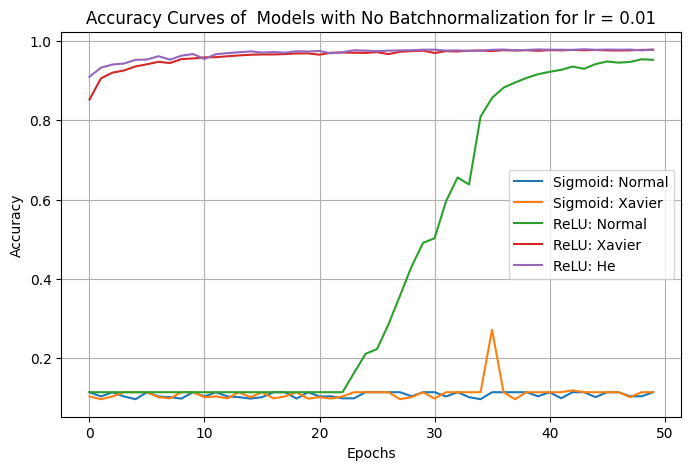

In [31]:
plt.figure(figsize=(8, 5))

plt.plot(m_nb_s_rn.history.history['val_accuracy'], label='Sigmoid: Normal')

plt.plot(m_nb_s_xa.history.history['val_accuracy'], label='Sigmoid: Xavier')

plt.plot(m_nb_r_nd.history.history['val_accuracy'], label='ReLU: Normal')

plt.plot(m_nb_r_xa.history.history['val_accuracy'], label='ReLU: Xavier')

plt.plot(m_nb_r_he.history.history['val_accuracy'], label='ReLU: He')

plt.title("Accuracy Curves of  Models with No Batchnormalization for lr = 0.01")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Training the models with Batchnormalization with below activation functions and initializer Learning rate = 0.01**


*   Activation function: the logistic sigmoid function; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: the logistic sigmoid function; initialization: Xavier initializer
*   Activation function: ReLU; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: ReLU; initialization: Xavier initializer
*   Activation function: ReLU; initialization: Kaiming He’s initializer


In [25]:
#training Model with batchnormalization with activation function sigmoid and random normal initializer

m_b_s_rn = Model_Fcnn_BN(activation_function=Activation_functions[1], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.01), lr = 0.01)

m_b_s_rn.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8603 - loss: 0.5807 - val_accuracy: 0.5859 - val_loss: 1.7713
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9193 - loss: 0.3073 - val_accuracy: 0.9330 - val_loss: 0.2579
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9355 - loss: 0.2438 - val_accuracy: 0.9394 - val_loss: 0.2121
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9459 - loss: 0.2049 - val_accuracy: 0.9454 - val_loss: 0.1873
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9557 - loss: 0.1722 - val_accuracy: 0.9497 - val_loss: 0.1848
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9604 - loss: 0.1495 - val_accuracy: 0.9581 - val_loss: 0.1503
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9638 - loss: 0.1343 - val_accuracy: 0.9553 - val_loss: 0.1515
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9680 - loss: 0.1188 - 

In [26]:
#training Model with batchnormalization with activation function sigmoid and xavier initializer

m_b_s_xa = Model_Fcnn_BN(activation_function=Activation_functions[1], initializer_function=initializers.GlorotUniform(), lr = 0.01)

m_b_s_xa.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.7384 - loss: 1.1044 - val_accuracy: 0.8997 - val_loss: 0.5094
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8961 - loss: 0.4242 - val_accuracy: 0.9115 - val_loss: 0.3427
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9077 - loss: 0.3528 - val_accuracy: 0.9180 - val_loss: 0.3054
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9120 - loss: 0.3230 - val_accuracy: 0.9218 - val_loss: 0.2853
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9212 - loss: 0.2951 - val_accuracy: 0.9267 - val_loss: 0.2673
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9251 - loss: 0.2739 - val_accuracy: 0.9288 - val_loss: 0.2523
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9290 - loss: 0.2589 - val_accuracy: 0.9310 - val_loss: 0.2421
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9331 - loss: 0.2450 - 

In [27]:
#training Model with batchnormalization with activation function relu and normal distribution initializer

m_b_r_nd = Model_Fcnn_BN(activation_function=Activation_functions[0], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.01), lr = 0.01)

m_b_r_nd.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9122 - loss: 0.2892 - val_accuracy: 0.9038 - val_loss: 0.3546
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9865 - loss: 0.0472 - val_accuracy: 0.9773 - val_loss: 0.0727
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.9938 - loss: 0.0243 - val_accuracy: 0.9810 - val_loss: 0.0602
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9972 - loss: 0.0132 - val_accuracy: 0.9818 - val_loss: 0.0618
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9987 - loss: 0.0073 - val_accuracy: 0.9818 - val_loss: 0.0598
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 0.9849 - val_loss: 0.0535
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9835 - val_loss: 0.0587
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9996 - loss: 0.0028 - 

In [28]:
#training Model with batchnormalization with activation function relu and xavier initializer

m_b_r_xa = Model_Fcnn_BN(activation_function=Activation_functions[0], initializer_function=initializers.GlorotUniform(), lr = 0.01)

m_b_r_xa.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7802 - loss: 0.7482 - val_accuracy: 0.9454 - val_loss: 0.1974
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9517 - loss: 0.1741 - val_accuracy: 0.9595 - val_loss: 0.1398
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9682 - loss: 0.1175 - val_accuracy: 0.9644 - val_loss: 0.1192
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9764 - loss: 0.0884 - val_accuracy: 0.9674 - val_loss: 0.1076
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9829 - loss: 0.0662 - val_accuracy: 0.9694 - val_loss: 0.0998
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9885 - loss: 0.0499 - val_accuracy: 0.9712 - val_loss: 0.0958
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9909 - loss: 0.0423 - val_accuracy: 0.9727 - val_loss: 0.0924
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9932 - loss: 0.0345 - 

In [29]:
#training Model with batchnormalization with activation function relu and Kaiming He’s initializer initializer

m_b_r_he = Model_Fcnn_BN(activation_function=Activation_functions[0], initializer_function=initializers.HeNormal(), lr = 0.01)

m_b_r_he.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7169 - loss: 0.9475 - val_accuracy: 0.9246 - val_loss: 0.2665
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9295 - loss: 0.2438 - val_accuracy: 0.9430 - val_loss: 0.1883
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9510 - loss: 0.1712 - val_accuracy: 0.9514 - val_loss: 0.1579
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9606 - loss: 0.1374 - val_accuracy: 0.9567 - val_loss: 0.1392
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9701 - loss: 0.1056 - val_accuracy: 0.9598 - val_loss: 0.1271
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9745 - loss: 0.0925 - val_accuracy: 0.9618 - val_loss: 0.1179
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9794 - loss: 0.0767 - val_accuracy: 0.9645 - val_loss: 0.1114
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9823 - loss: 0.0658 - 

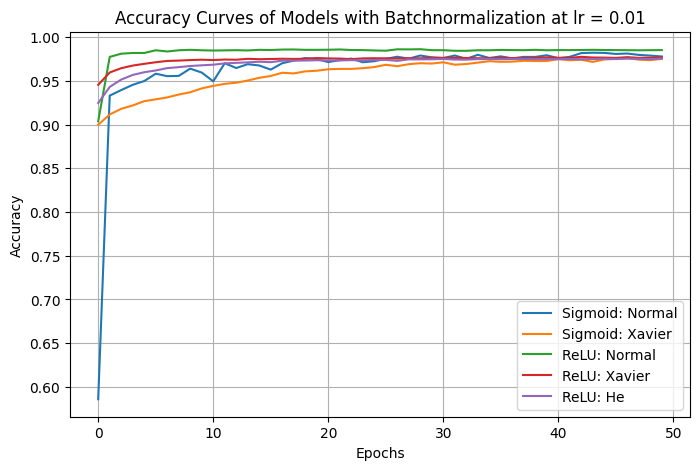

In [33]:
plt.figure(figsize=(8, 5))

plt.plot(m_b_s_rn.history.history['val_accuracy'], label='Sigmoid: Normal')

plt.plot(m_b_s_xa.history.history['val_accuracy'], label='Sigmoid: Xavier')

plt.plot(m_b_r_nd.history.history['val_accuracy'], label='ReLU: Normal')

plt.plot(m_b_r_xa.history.history['val_accuracy'], label='ReLU: Xavier')

plt.plot(m_b_r_he.history.history['val_accuracy'], label='ReLU: He')

plt.title("Accuracy Curves of Models with Batchnormalization at lr = 0.01")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Training the models with no Batchnormalization with below activation functions and initializer Learning rate = 0.001**


*   Activation function: the logistic sigmoid function; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: the logistic sigmoid function; initialization: Xavier initializer
*   Activation function: ReLU; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: ReLU; initialization: Xavier initializer
*   Activation function: ReLU; initialization: Kaiming He's initializer

In [7]:
#training Model with No batchnormalization with activation function sigmoid and random normal initializer with lr 0.001

m_nb_s_rn_lr001 = Model_Fcnn_No_BN(activation_function=Activation_functions[1], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.01), lr = 0.001)

m_nb_s_rn_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.1012 - loss: 2.3564 - val_accuracy: 0.1135 - val_loss: 2.3015
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.1107 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.1126 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1121 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1117 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.1122 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1130 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1121 - loss: 2.3015 - 

In [8]:
#training Model with No batchnormalization with activation function sigmoid and xavier initializer lr 0.001

m_nb_s_xa_lr001 = Model_Fcnn_No_BN(activation_function=Activation_functions[1], initializer_function=initializers.GlorotUniform(), lr = 0.001)

m_nb_s_xa_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.1024 - loss: 2.3461 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.1126 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1117 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.1119 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.1128 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.1112 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1119 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1111 - loss: 2.3017 - 

In [9]:
#training Model with No batchnormalization with activation function relu and normal distribution initializer lr 0.001

m_nb_r_nd_lr001 = Model_Fcnn_No_BN(activation_function=Activation_functions[0], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.01), lr = 0.001)

m_nb_r_nd_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.1183 - loss: 2.3025 - val_accuracy: 0.1135 - val_loss: 2.3023
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.1136 - loss: 2.3023 - val_accuracy: 0.1135 - val_loss: 2.3021
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.1125 - loss: 2.3021 - val_accuracy: 0.1135 - val_loss: 2.3019
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1122 - loss: 2.3019 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.1128 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3017
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.1135 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1101 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3015
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.1126 - loss: 2.3015 - 

In [10]:
#training Model with No batchnormalization with activation function relu and xavier initializer lr 0.001

m_nb_r_xa_lr001 = Model_Fcnn_No_BN(activation_function=Activation_functions[0], initializer_function=initializers.GlorotUniform(), lr = 0.001)

m_nb_r_xa_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.0858 - loss: 2.2999 - val_accuracy: 0.2799 - val_loss: 2.2326
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.3942 - loss: 2.2093 - val_accuracy: 0.6069 - val_loss: 2.1139
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6313 - loss: 2.0762 - val_accuracy: 0.6988 - val_loss: 1.8982
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7039 - loss: 1.8275 - val_accuracy: 0.7443 - val_loss: 1.5150
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7501 - loss: 1.4169 - val_accuracy: 0.7954 - val_loss: 1.0670
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7959 - loss: 1.0059 - val_accuracy: 0.8261 - val_loss: 0.7775
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8214 - loss: 0.7568 - val_accuracy: 0.8475 - val_loss: 0.6272
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8412 - loss: 0.6255 - 

In [11]:
#training Model with No batchnormalization with activation function relu and Kaiming He’s initializer initializer lr 0.001

m_nb_r_he_lr001 = Model_Fcnn_No_BN(activation_function=Activation_functions[0], initializer_function=initializers.HeNormal(), lr = 0.001)

m_nb_r_he_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.2815 - loss: 2.1595 - val_accuracy: 0.6958 - val_loss: 1.5465
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7275 - loss: 1.3589 - val_accuracy: 0.8111 - val_loss: 0.8489
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8142 - loss: 0.7911 - val_accuracy: 0.8533 - val_loss: 0.5851
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8485 - loss: 0.5760 - val_accuracy: 0.8722 - val_loss: 0.4740
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8710 - loss: 0.4771 - val_accuracy: 0.8877 - val_loss: 0.4119
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8839 - loss: 0.4211 - val_accuracy: 0.8971 - val_loss: 0.3734
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8932 - loss: 0.3853 - val_accuracy: 0.9050 - val_loss: 0.3438
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9023 - loss: 0.3513 - 

**Accuracy curve of above models with learning rate 0.001**

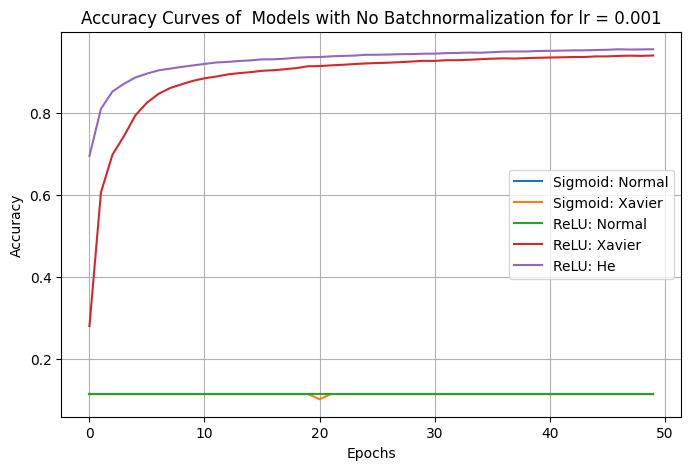

In [13]:
plt.figure(figsize=(8, 5))

plt.plot(m_nb_s_rn_lr001.history.history['val_accuracy'], label='Sigmoid: Normal')

plt.plot(m_nb_s_xa_lr001.history.history['val_accuracy'], label='Sigmoid: Xavier')

plt.plot(m_nb_r_nd_lr001.history.history['val_accuracy'], label='ReLU: Normal')

plt.plot(m_nb_r_xa_lr001.history.history['val_accuracy'], label='ReLU: Xavier')

plt.plot(m_nb_r_he_lr001.history.history['val_accuracy'], label='ReLU: He')

plt.title("Accuracy Curves of  Models with No Batchnormalization for lr = 0.001")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Training the models with Batchnormalization with below activation functions and initializer Learning rate = 0.001**


*   Activation function: the logistic sigmoid function; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: the logistic sigmoid function; initialization: Xavier initializer
*   Activation function: ReLU; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0.01)
*   Activation function: ReLU; initialization: Xavier initializer
*   Activation function: ReLU; initialization: Kaiming He's initializer

In [14]:
#training Model with batchnormalization with activation function sigmoid and random normal initializer lr 0.001

m_b_s_rn_lr001 = Model_Fcnn_BN(activation_function=Activation_functions[1], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.001), lr = 0.001)

m_b_s_rn_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.1026 - loss: 2.3297 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.1130 - loss: 2.3012 - val_accuracy: 0.1028 - val_loss: 2.3003
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.1147 - loss: 2.2985 - val_accuracy: 0.2107 - val_loss: 2.0576
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.2494 - loss: 1.8643 - val_accuracy: 0.2898 - val_loss: 1.6923
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.3105 - loss: 1.6997 - val_accuracy: 0.3152 - val_loss: 1.6657
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.3530 - loss: 1.6444 - val_accuracy: 0.5896 - val_loss: 1.2389
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.6007 - loss: 1.2456 - val_accuracy: 0.6599 - val_loss: 1.1322
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6910 - loss: 1.0869 - 

In [15]:
#training Model with batchnormalization with activation function sigmoid and xavier initializer lr 0.001

m_b_s_xa_lr001 = Model_Fcnn_BN(activation_function=Activation_functions[1], initializer_function=initializers.GlorotUniform(), lr = 0.001)

m_b_s_xa_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.3785 - loss: 1.9940 - val_accuracy: 0.7882 - val_loss: 1.3233
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7940 - loss: 1.1199 - val_accuracy: 0.8432 - val_loss: 0.8624
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8378 - loss: 0.8525 - val_accuracy: 0.8610 - val_loss: 0.7116
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8551 - loss: 0.7189 - val_accuracy: 0.8715 - val_loss: 0.6230
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8612 - loss: 0.6440 - val_accuracy: 0.8803 - val_loss: 0.5638
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8718 - loss: 0.5839 - val_accuracy: 0.8872 - val_loss: 0.5208
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8789 - loss: 0.5405 - val_accuracy: 0.8906 - val_loss: 0.4887
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8821 - loss: 0.5131 - 

In [16]:
#training Model with batchnormalization with activation function relu and normal distribution initializer lr 0.001

m_b_r_nd_lr001 = Model_Fcnn_BN(activation_function=Activation_functions[0], initializer_function=initializers.RandomNormal(mean=0.0, stddev=0.001), lr = 0.01)

m_b_r_nd_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8289 - loss: 0.5882 - val_accuracy: 0.5389 - val_loss: 1.2398
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9673 - loss: 0.1094 - val_accuracy: 0.9742 - val_loss: 0.0859
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9782 - loss: 0.0701 - val_accuracy: 0.9770 - val_loss: 0.0761
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9841 - loss: 0.0531 - val_accuracy: 0.9800 - val_loss: 0.0688
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9793 - val_loss: 0.0744
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9775 - val_loss: 0.0783
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9913 - loss: 0.0282 - val_accuracy: 0.9785 - val_loss: 0.0804
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9924 - loss: 0.0224 - 

In [17]:
#training Model with batchnormalization with activation function relu and xavier initializer lr 0.001

m_b_r_xa_lr001 = Model_Fcnn_BN(activation_function=Activation_functions[0], initializer_function=initializers.GlorotUniform(), lr = 0.001)

m_b_r_xa_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.4284 - loss: 1.7707 - val_accuracy: 0.8245 - val_loss: 0.7034
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8327 - loss: 0.6415 - val_accuracy: 0.8845 - val_loss: 0.4485
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.8828 - loss: 0.4501 - val_accuracy: 0.9043 - val_loss: 0.3578
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9040 - loss: 0.3657 - val_accuracy: 0.9168 - val_loss: 0.3081
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9151 - loss: 0.3188 - val_accuracy: 0.9246 - val_loss: 0.2750
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9238 - loss: 0.2819 - val_accuracy: 0.9309 - val_loss: 0.2509
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9290 - loss: 0.2592 - val_accuracy: 0.9336 - val_loss: 0.2330
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9355 - loss: 0.2377 - 

In [18]:
#training Model with batchnormalization with activation function relu and Kaiming He’s initializer initializer lr 0.001

m_b_r_he_lr001 = Model_Fcnn_BN(activation_function=Activation_functions[0], initializer_function=initializers.HeNormal(), lr = 0.001)

m_b_r_he_lr001.fit(x_train, y_train_onehot, epochs=50, batch_size=128, validation_data=(x_test, y_test_onehot))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.3265 - loss: 2.0225 - val_accuracy: 0.7280 - val_loss: 0.9974
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7565 - loss: 0.9044 - val_accuracy: 0.8331 - val_loss: 0.6393
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8325 - loss: 0.6339 - val_accuracy: 0.8697 - val_loss: 0.4967
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8641 - loss: 0.5102 - val_accuracy: 0.8894 - val_loss: 0.4178
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8862 - loss: 0.4294 - val_accuracy: 0.9014 - val_loss: 0.3668
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8967 - loss: 0.3829 - val_accuracy: 0.9105 - val_loss: 0.3311
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9056 - loss: 0.3439 - val_accuracy: 0.9164 - val_loss: 0.3050
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9142 - loss: 0.3119 - 

**Accuracy curve of above models with learning rate = 0.001**

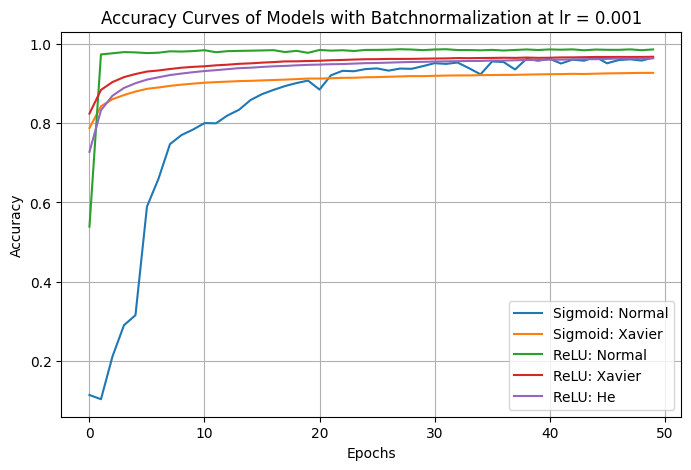

In [19]:
plt.figure(figsize=(8, 5))

plt.plot(m_b_s_rn_lr001.history.history['val_accuracy'], label='Sigmoid: Normal')

plt.plot(m_b_s_xa_lr001.history.history['val_accuracy'], label='Sigmoid: Xavier')

plt.plot(m_b_r_nd_lr001.history.history['val_accuracy'], label='ReLU: Normal')

plt.plot(m_b_r_xa_lr001.history.history['val_accuracy'], label='ReLU: Xavier')

plt.plot(m_b_r_he_lr001.history.history['val_accuracy'], label='ReLU: He')

plt.title("Accuracy Curves of Models with Batchnormalization at lr = 0.001")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()